# Solución de pendulo simple con el método de Euler
Ver: __Numerical Analysis__, Richard L. Burden, J. Douglas Faires, Capitulo 5.2 "Euler´s method"
##### Creado por Gabriel Missael Barco, el 24/01/2020

Solucionaremos la EDO del pendulo simple con el método de Euler, de dos maneras distintas: en una, aprovecharemos la libreria Numpy y las caracteristias de python, y en la otra, crearemos un codigo similar al que realizariamos en C/C++ o Pascal.

Primero importamos las librerias que utilizaremos. Especificamente **Numpy** nos servirá para crear y operar arreglos de manera eficiente; **Matplotlib** para gráficar y comparar los resultados, **Math** para usar funciones matematicas (seno/coseno) y finalmente **Time** nos permite medir el tiempo de ejecución de un pedazo de codigo determinado. Esta ultima nos ayudará a comparar el tiempo de ejecución de las dos soluciones

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import time

%matplotlib inline

Declaramos los **parametros iniciales** necesarios para resolver el sistema del pendulo, así como el paso de tiempo y el tiempo total de analisis.

In [54]:
A = 1/8*3.1416 #Aplitud en radianes
w = 3          #Frecuencia angular (sqrt(g/l))
T = 20         #Tiempo de analisis
h = 0.0001      #Paso de tiempo
n = int(T/h)   #Numero de datos

### Versión de codigo no optimizado a Python

Trabajamos con listas y ciclos, sin utilizar Numpy. Posteriormente graficamos la posición y la velocidad respecto al tiempo, y comparamos lo obtenido con la solución analitica real del sistema con los parametros dados. También mediremos el tiempo de ejecución completo de esta celda, usando 'time.time()'

Tiempo de ejecución: 0.3950188159942627 segundos


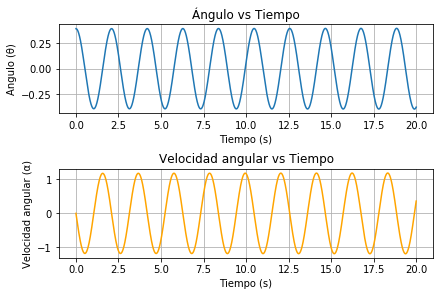

In [55]:
#Inicio contador
start_time = time.time()

#Listas
t = []  #Tiempo
v = []  #Velocidad
a = []  #Angulo (Posición)

v.append(0)
a.append(A)
t.append(0)

#Solución numerica 
for i in range(n-1):
    v.append(v[i] + (-w**2*a[i])*h)
    a.append(a[i] + (h*v[i]))
    t.append(i*h)

#Grafica de la solución
fig, (ax0, ax1) = plt.subplots(nrows=2, constrained_layout=True)
ax0.plot(t, a)
ax0.set_title("Ángulo vs Tiempo")
ax0.grid()
ax0.set_ylabel("Angulo (θ)")
ax0.set_xlabel("Tiempo (s)")

ax1.plot(t, v, color='orange')
ax1.set_title("Velocidad angular vs Tiempo")
ax1.grid()
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Velocidad angular (α)")

print("Tiempo de ejecución: %s segundos" % (time.time() - start_time))

### Version optimizada a python
Usaremos Numpy para crear arreglos y operarlos entre ellos.

Tiempo de ejecución: 0.4253065586090088 segundos


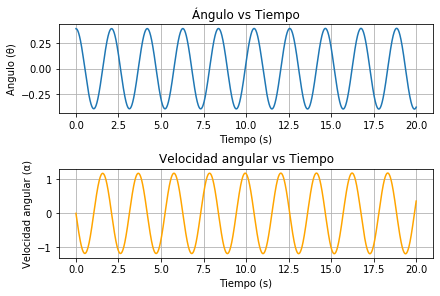

In [56]:
#Inicio contador
start_time = time.time()

#Arreglos
t2 = np.linspace(0, n-1, n)
t2 = t2*h
v2 = np.zeros(n)
a2 = np.zeros(n)

a2[0] = A

#Solución numerica 
for i in range(n-1):
    v2[i+1] = v2[i] + (-w**2*a2[i])*h
    a2[i+1] = a2[i] + (h*v2[i])

#Grafica de la solución
fig, (ax0, ax1) = plt.subplots(nrows=2, constrained_layout=True)
ax0.plot(t2, a2)
ax0.set_title("Ángulo vs Tiempo")
ax0.grid()
ax0.set_ylabel("Angulo (θ)")
ax0.set_xlabel("Tiempo (s)")

ax1.plot(t2, v2, color='orange')
ax1.set_title("Velocidad angular vs Tiempo")
ax1.grid()
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Velocidad angular (α)")

print("Tiempo de ejecución: %s segundos" % (time.time() - start_time))

### Comparación con solución analitica

En la siguiente gráfica podemos ver que la aproximación obtenida es **identica** a la solución analitica del sistema del pendulo.

Text(0.5, 1.0, 'Comparación de aproximación con solución real')

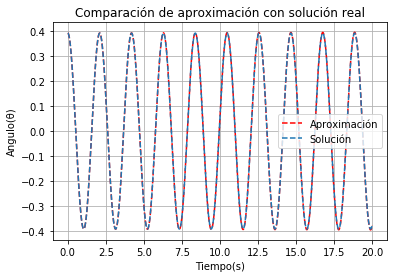

In [57]:
plt.plot(t, a, "--", color = "red", label = "Aproximación")
plt.plot(t2, A*np.cos(w*t2), "--", label = "Solución")
plt.grid()
plt.legend()
plt.xlabel("Tiempo(s)")
plt.ylabel("Angulo(θ)")
plt.title("Comparación de aproximación con solución real")

### Comparación de tiempo de ejecución

Numero de datos = 200,000

|  **Programa**  |**Tiempo de ejecución**|
|----------------|-----------------------|
| Con Numpy      | 0.441739 segundos     |
| Sin Numpy      | 0.294633 segundos     |

Sorprendentemente, parece ser que el tiempo de ejecución es menor al no usar Numpy, sin embargo, esto casi nunca es así. En este caso particular, cuando usamos Numpy recorrimos **dos veces** todos los arreglos, una al crearlos y otra al calcular, mientras que sin Numpy, utilizando listas, solo los recorrimos **una vez**, ya que los creamos y les asignamos valor al mismo tiempo. Cuando tenemos mas uso de **operaciones entre arreglos**, Numpy resulta ser mucho mas eficiente. Podemos ver eso en el siguiente ejemplo, donde llevamos acabo 5 operaciones entre los arreglos que utilizamos.

In [58]:
start_time = time.time()
for i in range(n-1):
    t[i] = t[i] + t[i]
    t2[i] = t2[i]*3/17
    a[i] = mt.log(np.abs(a[i]))
    a2[i] = mt.cos(a2[i]) + mt.sin(a2[i])
    v[i] = v[i] + v[i] + a[i]
print("Tiempo de ejecución: %s segundos" % (time.time() - start_time))

Tiempo de ejecución: 0.713914155960083 segundos


In [59]:
start_time = time.time()
t = t + t
t2 = t2*3/17
a = np.log(np.abs(a))
a2 = np.cos(a2) + np.sin(a2)
v = v + v 
print("Tiempo de ejecución: %s segundos" % (time.time() - start_time))

Tiempo de ejecución: 0.04446697235107422 segundos


Numero de datos = 200,000

|  **Programa**  |**Tiempo de ejecución**|
|----------------|-----------------------|
| Con Numpy      | 0.0444669723 segundos |
| Sin Numpy      | 0.7139141559 segundos |

Podemos observar que en este caso, tras llevar a cabo tan solo unas pocas operaciones entre los arreglos, Numpy resulto ser mas de diez veces **mas eficiente**, y esto es para estas pocas operaciones, en el caso de tener mas operaciones y mas datos, esta diferencia en el tiempo de ejecución crece mucho mas. **En general**, es evidente que es mejor trabajar con Numpy para manejar arreglos de datos, **en particula** en el caso de la solución del pendulo con Euler esta ventaja fue inexistente simplemente porque no fueron necesarias operaciones entre arreglos y porque sin Numpy se recorrieron solo una vez los arreglos.